# Text Conditioning and Machine Learning

This notebook lays out the process of some exploratory data analysis for the twitter disaster data pulled. This is to get a sense of the data whcih will be used for training, and to idetify potential hinderances going forward

## Python Packages Used
This notebook was set up in an environment running Python 3.8 with the following packages:
pandas, tensorflow, keras, scikit-learn, nltk, gensim

In [1]:
import os 
import pandas as pd
import collections as col
import pprint
import scipy.sparse as sp
from sklearn.feature_extraction.text import CountVectorizer
from operator import itemgetter
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt
import string
import twokenize
from nltk.stem.porter import PorterStemmer

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as stats
import scipy

In [2]:
code_dir = os.getcwd()
parent_dir = os.path.dirname(code_dir)
print(parent_dir)

/Volumes/Elements/DataScience/dsa/capstone


## [Crisis Benchmark data for training Models](https://crisisnlp.qcri.org/crisis_datasets_benchmarks.html)

<p>The crisis benchmark dataset consists data from several different data sources such as CrisisLex (<a href="http://crisislex.org/data-collections.html#CrisisLexT26" target="_blank">CrisisLex26</a>, <a href="http://crisislex.org/data-collections.html#CrisisLexT6" target="_blank">CrisisLex6</a>), <a href="https://crisisnlp.qcri.org/lrec2016/lrec2016.html" target="_blank">CrisisNLP</a>, <a href="http://mimran.me/papers/imran_shady_carlos_fernando_patrick_practical_2013.pdf" target="_blank">SWDM2013</a>, <a href="http://mimran.me/papers/imran_shady_carlos_fernando_patrick_iscram2013.pdf" target="_blank">ISCRAM13</a>, Disaster Response Data (DRD), <a href="https://data.world/crowdflower/disasters-on-social-media" target="_blank">Disasters on Social Media (DSM)</a>, <a href="https://crisisnlp.qcri.org/crisismmd" target="_blank">CrisisMMD</a> and data from <a href="http://aidr.qcri.org/" target="_blank">AIDR</a>. 
	  The class label was mapped, remove duplicates removed and this was provided as a benchmark results for the community. </p>

The authors have their model and data availible on github at <a href="https://github.com/firojalam/crisis_datasets_benchmarks">https://github.com/firojalam/crisis_datasets_benchmarks</a>    </p>

#### Data Availible from: https://crisisnlp.qcri.org/data/crisis_datasets_benchmarks/crisis_datasets_benchmarks_v1.0.tar.gz
<h4><strong>References</strong></h4>
<ol>
<li><a href="http://sites.google.com/site/firojalam/">Firoj Alam</a>, <a href="https://hsajjad.github.io/">Hassan Sajjad</a>, <a href="http://mimran.me/">Muhammad Imran</a> and <a href="https://sites.google.com/site/ferdaofli/">Ferda Ofli</a>, <a href="https://arxiv.org/abs/2004.06774" target="_blank"><strong>CrisisBench: Benchmarking Crisis-related Social Media Datasets for Humanitarian Information Processing,</strong></a> In ICWSM, 2021. [<a href="crisis_dataset_bib1.html">Bibtex</a>]
        </li>
<!-- <li><a href="http://sites.google.com/site/firojalam/">Firoj Alam</a>, <a href="https://hsajjad.github.io/">Hassan Sajjad</a>, <a href="http://mimran.me/">Muhammad Imran</a> and <a href="https://sites.google.com/site/ferdaofli/">Ferda Ofli</a>, <a href="https://arxiv.org/abs/2004.06774" target="_blank"><strong>Standardizing and Benchmarking Crisis-related Social Media Datasets for Humanitarian Information Processing,</strong></a> In arxiv, 2020. [<a href="crisis_dataset_bib.html">Bibtex</a>]</li>-->
        <li>Firoj Alam, Ferda Ofli and Muhammad Imran. CrisisMMD: Multimodal Twitter Datasets from Natural Disasters. In Proceedings of the International AAAI Conference on Web and Social Media (ICWSM), 2018, Stanford, California, USA.</li>
        <li>Muhammad Imran, Prasenjit Mitra, and Carlos Castillo: Twitter as a Lifeline: Human-annotated Twitter Corpora for NLP of Crisis-related Messages. In Proceedings of the 10th Language Resources and Evaluation Conference (LREC), pp. 1638-1643. May 2016, Portorož, Slovenia.</li>
        <li>A. Olteanu, S. Vieweg, C. Castillo. 2015. What to Expect When the Unexpected Happens: Social Media Communications Across Crises. In Proceedings of the ACM 2015 Conference on Computer Supported Cooperative Work and Social Computing (CSCW '15). ACM, Vancouver, BC, Canada.</li>
        <li>A. Olteanu, C. Castillo, F. Diaz, S. Vieweg. 2014. CrisisLex: A Lexicon for Collecting and Filtering Microblogged Communications in Crises. In Proceedings of the AAAI Conference on Weblogs and Social Media (ICWSM'14). AAAI Press, Ann Arbor, MI, USA.</li>
        <li>Muhammad Imran, Shady Elbassuoni, Carlos Castillo, Fernando Diaz and Patrick Meier. Extracting Information Nuggets from Disaster-Related Messages in Social Media. In Proceedings of the 10th International Conference on Information Systems for Crisis Response and Management (ISCRAM), May 2013, Baden-Baden, Germany.</li>
        <li>Muhammad Imran, Shady Elbassuoni, Carlos Castillo, Fernando Diaz and Patrick Meier. Practical Extraction of Disaster-Relevant Information from Social Media. In Social Web for Disaster Management (SWDM'13) - Co-located with WWW, May 2013, Rio de Janeiro, Brazil.</li>
        <li>https://appen.com/datasets/combined- disaster-response-data/</li>
        <li>https://data.world/crowdflower/disasters- on-social-media</li>

### Pull text into notebook and Perform Some Exploratory Anaylsis

In [3]:
# Set up folders
labled_data_folder  =  os.path.join(parent_dir,"Data/crisis_datasets_benchmarks/all_data_en")
initial_filtering_folder = os.path.join(parent_dir,"Data/crisis_datasets_benchmarks/initial_filtering")
self_pull_folder = os.path.join(parent_dir,"Data/scraped")

In [4]:
# Establish dataframes

train =  pd.read_table(os.path.join
                       (labled_data_folder,
                                    "crisis_consolidated_informativeness_filtered_lang_en_train.tsv"))
test  =  pd.read_table(os.path.join
                       (labled_data_folder,
                                    "crisis_consolidated_informativeness_filtered_lang_en_test.tsv"),
                       sep ='\t', quoting =3)
dev =  pd.read_table(os.path.join
                     (labled_data_folder,
                                  "crisis_consolidated_informativeness_filtered_lang_en_dev.tsv"))
filtered  = pd.read_table(os.path.join
                       (initial_filtering_folder,
                                    "crisis_consolidated_informativeness_filtered_lang.tsv"))
english = filtered[filtered["lang"] == 'en']


# geotweets = pd.read_csv(os.path.join(self_pull_folder,"tweetsid.csv"))
# nogeotweets = pd.read_csv(os.path.join(self_pull_folder,"tweets_no_geo.csv"))
dflist = [train, test, dev, filtered, english ]

combinedf = pd.concat(dflist[0:3])
dflist.append(combinedf)
dfnames = ['train', 'test', 'dev', 'filtered', 'english', 'combinedf']

The twitter data were availible in multiple .tsv files. The filitered data .tsv has duplicate tweets (based on twiiter id), and tweets with the same text removed, and has tweets from multiple languages included. Pre spilt .tsv files were included in the downloaded data set. 

The english data frame selects just the English language tweets from the filtered data set. Interestingly, the train/test/dev data do not have an identical count as the english filtered dataset. 

As noted below there are 61 total events observed in the overall data set. One event is not present in either the test or dev data. 

All tweets are in english. 

Below are exploratory statistics to see if there is a significant difference in variables, how does the distribution of events change between the train, test, dev samples, and the informativeness of the tweet. The goal is to gain an understanding how much influence the humanitarian event has on the classification of the usefullness


The first plots will break out counts of tweets for each humanitarian crisis for each data set (train, test, dev; filtered, just english, and the combination of the train test dev data) to see the distrubtuin. Afterwards, the data are spilt by the "class_label" variable to determine, what if any differecne there is between the distrubition of tweets by events of the informative vs not informative tweets.

In [5]:
#itertate over the the data frames and pull value counts for the whole dataset

valuecountdfs_all_data=[]
valuecountnames_all_data=[]

for i, df in enumerate(dflist):
    print("For the {0} dataframe the shape is: {1}".format(dfnames[i],dflist[i].shape))
    print("Data Types for {0}:\n{1}".format(dfnames[i],dflist[i].dtypes))
    for j, col in enumerate(dflist[i].select_dtypes(include=['object'])):
        if col.lower() in  ('event'):
            print("There are {0} unique {1} for the {2} dataframe".format(len(dflist[i][col].unique()),col,dfnames[i]))              
            name= [col,dfnames[i]]

            valuecountdfs_all_data.append(pd.DataFrame(dflist[i][col].value_counts()))
            valuecountnames_all_data.append(name)
        else:
            print("There are {0} unique {1} for the {2} dataframe".format(len(dflist[i][col].unique()),col,dfnames[i]))              
    print("\n")

For the train dataframe the shape is: (109441, 7)
Data Types for train:
id               int64
event           object
source          object
text            object
lang            object
lang_conf      float64
class_label     object
dtype: object
There are 61 unique event for the train dataframe
There are 10 unique source for the train dataframe
There are 109441 unique text for the train dataframe
There are 1 unique lang for the train dataframe
There are 2 unique class_label for the train dataframe


For the test dataframe the shape is: (31095, 7)
Data Types for test:
id               int64
event           object
source          object
text            object
lang            object
lang_conf      float64
class_label     object
dtype: object
There are 60 unique event for the test dataframe
There are 10 unique source for the test dataframe
There are 31095 unique text for the test dataframe
There are 1 unique lang for the test dataframe
There are 2 unique class_label for the test dataframe

<module 'matplotlib.pyplot' from '/Volumes/Elements/DataScience/anaconda3/envs/machinelearning/lib/python3.8/site-packages/matplotlib/pyplot.py'>

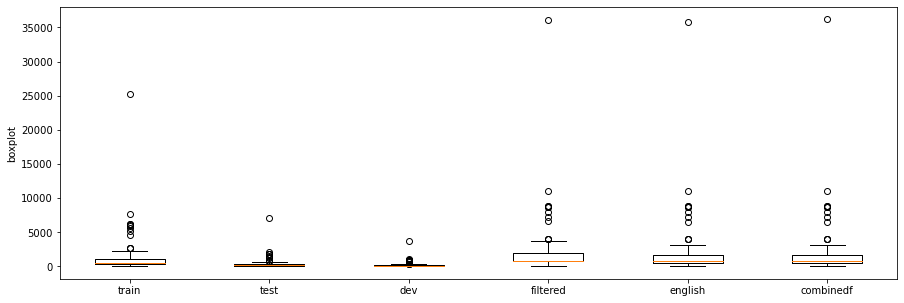

In [6]:
boxlist=[]
boxname=[]
tickl=[]
for k, df in enumerate(valuecountdfs_all_data):
    boxlist.append(valuecountdfs_all_data[k].reset_index(drop=True).squeeze())
    boxname.append(valuecountnames_all_data[k][1])
    tickl.append(k+1)
    
plt.figure(figsize=(15, 5)) 

plt.boxplot(boxlist) 


plt.ylabel("boxplot")

plt.xticks(tickl, boxname)
#plt.ylim(5, 25)
plt
# boxname

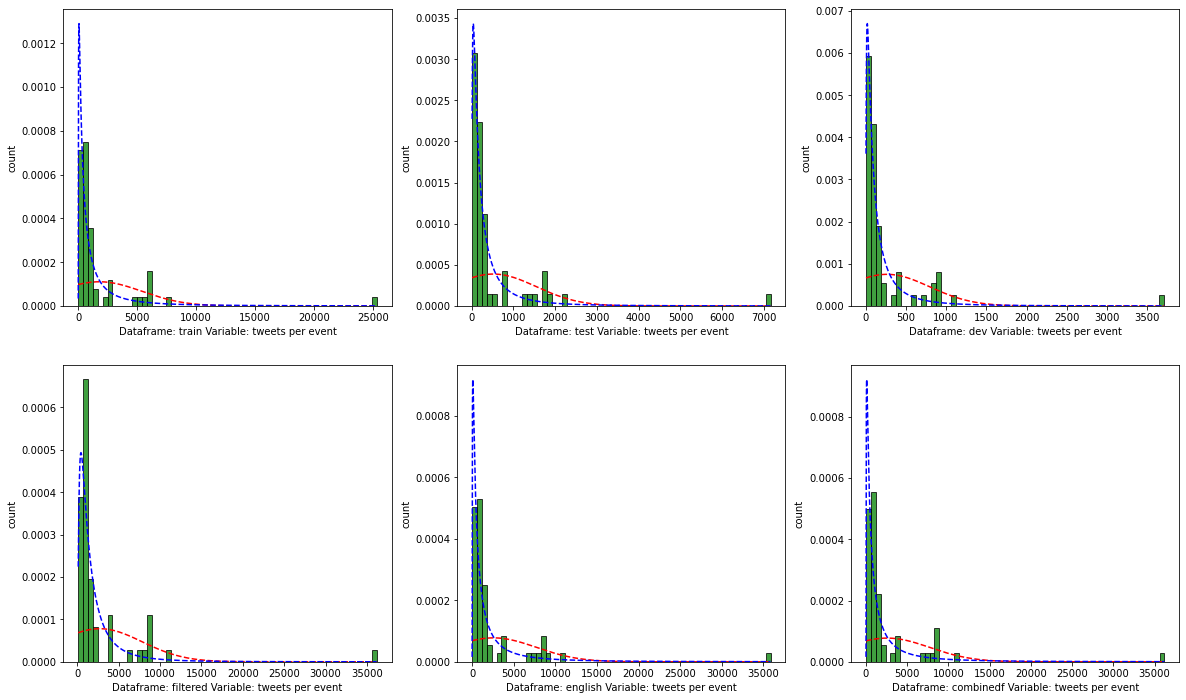

In [15]:
# 2) Add your code in the Cells below, add more cells if necessary
# ----------------------------------------------------------------
plt.figure(figsize=(20, 12))

for k, df in enumerate(valuecountdfs_all_data):
    plt.subplot(2,3,1+k)
    plt.hist(                 # Use the histogram function
        valuecountdfs_all_data[k],            # Select a column of data from the dataframe to plot
        bins=len(valuecountdfs_all_data[k]),             # Parameterize the number of buckets to collect data into
        density=True,             # Normalize the counts (1 = yes, 0 = no) into a portion of 1.0 (aka 100%)
        facecolor='green',    # Define the color of the plotted elements
        alpha=0.75,           # Define the transparency of the plotted elements
        edgecolor="k"         # Define bin edge color (k = black)
        )
    # Add a label to the X-axis
    s, loc, scale = stats.lognorm.fit(valuecountdfs_all_data[k], floc=0)
    estimated_mu = np.log(scale)
    estimated_sigma = s
    mu = valuecountdfs_all_data[k]['event'].mean()
    sigma = valuecountdfs_all_data[k]['event'].std()
    x=np.arange(min(valuecountdfs_all_data[k]['event']),
                max(valuecountdfs_all_data[k]['event']),0.1)
    # Calculate and plot a normal distribution Probability Density Function or PDF
#     y2 = stats.norm.pdf(x, mu, sigma)  # Alternate: y = stats.norm.pdf(x, mu, sigma)
    y = stats.lognorm.pdf(x, s, scale=scale)

#     plt.plot(x,y2,'r--')
    plt.plot(x,y,'b--')   
    
    
    plt.xlabel("Dataframe: {0} Variable: tweets per {1}".format(valuecountnames_all_data[k][1],valuecountnames_all_data[k][0]))
    plt.ylabel("count")  


    # Render the plot

plt.show()


In [8]:
valuecountdfs_all_data2=[]
valuecountnames_all_data2=[]

for i, df in enumerate(dflist):
    df = dflist[i].groupby('class_label')
#     print("For the {0} dataframe the shape is: {1}".format(dfnames[i],df.shape))
    print("Data Types for {0}:\n{1}".format(dfnames[i],df.dtypes))           
    name= [col,dfnames[i]]
    valuecountdfs_all_data2.append(df)
    valuecountnames_all_data2.append(name)

Data Types for train:
                    id   event  source    text    lang lang_conf
class_label                                                     
informative      int64  object  object  object  object   float64
not_informative  int64  object  object  object  object   float64
Data Types for test:
                    id   event  source    text    lang lang_conf
class_label                                                     
informative      int64  object  object  object  object   float64
not_informative  int64  object  object  object  object   float64
Data Types for dev:
                    id   event  source    text    lang lang_conf
class_label                                                     
informative      int64  object  object  object  object   float64
not_informative  int64  object  object  object  object   float64
Data Types for filtered:
                    id   event  source    text    lang lang_confidence
class_label                                                  

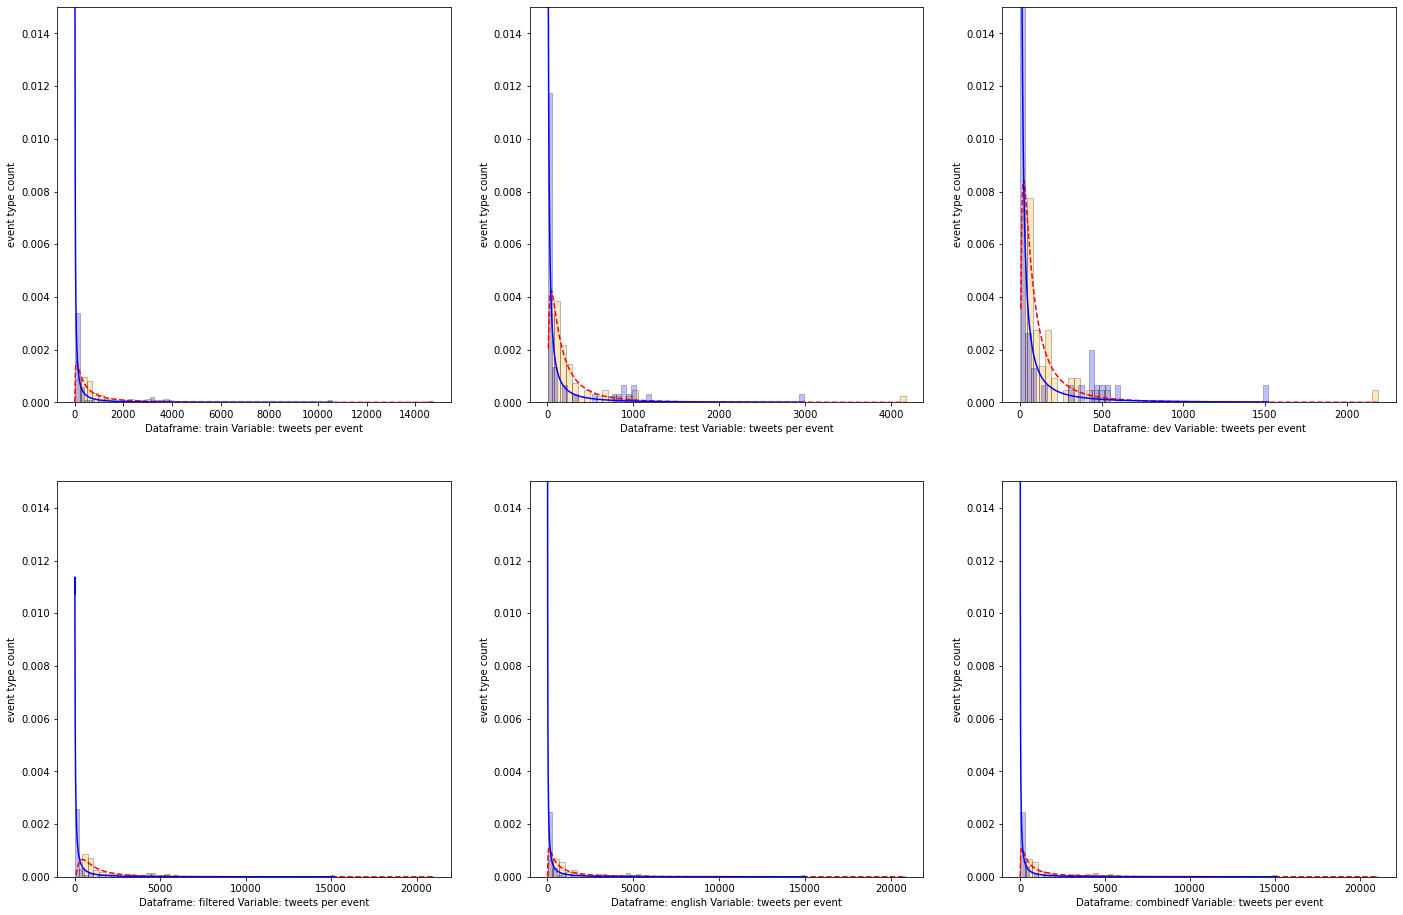

In [47]:
# 2) Add your code in the Cells below, add more cells if necessary
# ----------------------------------------------------------------
plt.figure(figsize=(24, 16))

for k, df in enumerate(valuecountdfs_all_data2):
    plt.subplot(2,3,1+k)
#     plt.hist(                 # Use the histogram function
#         valuecountdfs_all_data[k],            # Select a column of data from the dataframe to plot
#         bins=len(valuecountdfs_all_data[k]),             # Parameterize the number of buckets to collect data into
#         facecolor='green',    # Define the color of the plotted elements
#         alpha=0.25,           # Define the transparency of the plotted elements
#         edgecolor="k"         # Define bin edge color (k = black)
#         )    
    plt.hist(                 # Use the histogram function
        valuecountdfs_all_data2[k]['event'].get_group('informative').value_counts(),            # Select a column of data from the dataframe to plot
        bins=len(valuecountdfs_all_data2[k]['event'].get_group('informative').value_counts()),             # Parameterize the number of buckets to collect data into
        facecolor='orange',    # Define the color of the plotted elements
        density=True,
        alpha=0.25,           # Define the transparency of the plotted elements
        edgecolor="k"         # Define bin edge color (k = black)
        
        )
    plt.hist(                 # Use the histogram function
        valuecountdfs_all_data2[k]['event'].get_group('not_informative').value_counts(),            # Select a column of data from the dataframe to plot
        bins=len(valuecountdfs_all_data2[k]['event'].get_group('not_informative').value_counts()),             # Parameterize the number of buckets to collect data into
        facecolor='blue',    # Define the color of the plotted elements
        density=True,
        alpha=0.25,           # Define the transparency of the plotted elements
        edgecolor="k"         # Define bin edge color (k = black)
        )
    
    s, loc, scale = stats.lognorm.fit(valuecountdfs_all_data2[k]['event'].get_group('informative').value_counts(), floc=0)
    estimated_mu = np.log(scale)
    estimated_sigma = s
#     mu = valuecountdfs_all_data2[k]['event'].get_group('informative').value_counts()
#     sigma = valuecountdfs_all_data2[k]['event'].get_group('informative').value_counts()
    x = np.arange(min(valuecountdfs_all_data2[k]['event'].get_group('informative').value_counts()),
                max(valuecountdfs_all_data2[k]['event'].get_group('informative').value_counts()),0.1)
    # Calculate and plot a normal distribution Probability Density Function or PDF
#     y = stats.norm.pdf(x, mu, sigma)  # Alternate: y = stats.norm.pdf(x, mu, sigma)
    y = stats.lognorm.pdf(x, s, scale=scale)   

    s2, loc2, scale2 = stats.lognorm.fit(valuecountdfs_all_data2[k]['event'].get_group('not_informative').value_counts(), floc=0)
    estimated_mu2 = np.log(scale2)
    estimated_sigma2 = s2

#     mu2 = valuecountdfs_all_data2[k]['event'].get_group('not_informative').value_counts().mean()
#     sigma2 = valuecountdfs_all_data2[k]['event'].get_group('not_informative').value_counts().std()
    x2=np.arange(min(valuecountdfs_all_data2[k]['event'].get_group('not_informative').value_counts()),
                max(valuecountdfs_all_data2[k]['event'].get_group('not_informative').value_counts()),0.1)
    # Calculate and plot a normal distribution Probability Density Function or PDF
#     y2 = stats.norm.pdf(x2, mu2, sigma2)  # Alternate: y = stats.norm.pdf(x, mu, sigma)
    maxevent = max(valuecountdfs_all_data2[k]['event'].get_group('not_informative').value_counts())
    length = len(valuecountdfs_all_data2[k]['event'].get_group('not_informative'))
    plt.ylim(0,.015)
    y2 = stats.lognorm.pdf(x2, s2, scale=scale2)
#     plt.ylim(0,max(valuecountdfs_all_data2[k]['event'].get_group('not_informative').value_counts()))
    plt.plot(x,y,'r--')
    plt.plot(x2,y2,'b-')
    plt.xlabel("Dataframe: {0} Variable: tweets per {1}".format(valuecountnames_all_data[k][1],valuecountnames_all_data[k][0]))
    plt.ylabel("event type count")



    # Render the plot

plt.show()


In [40]:
maxevent = max(valuecountdfs_all_data2[k]['event'].get_group('not_informative').value_counts())
length = len(valuecountdfs_all_data2[k]['event'].get_group('not_informative'))
print ("Max: {} \nOveral Numbers: {} \n{}".format(maxevent,length,(maxevent/length)))


Max: 15098 
Overal Numbers: 62662 
0.24094347451405956


In [ ]:
boxlist2=[]
boxname=[]

for k, df in enumerate(valuecountdfs_all_data):
    boxlist2.append(valuecountdfs_all_data2[k]['event'].get_group('informative').value_counts().reset_index(drop=True).squeeze())
    boxlist2.append(valuecountdfs_all_data2[k]['event'].get_group('not_informative').value_counts().reset_index(drop=True).squeeze())    
    boxname.append(valuecountnames_all_data[k][1])
    boxname.append(valuecountnames_all_data[k][1])
plt.figure(figsize=(15, 5)) 

plt.boxplot(boxlist2) 


plt.ylabel("boxplot")

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], boxname)
#plt.ylim(5, 25)
plt
# boxname

### Analyis

The counts of tweets in each event apear lognormally distributed, that is most of the the humanitarian crisis events in the combined and english dataframes have fewer than 10,000 tweets. While the absolute counts of tweets decreases from the Combined, through the the train, test and dev data sets, for the combined informativeness, and the informative/not-informative split the shape of the distributions appear consistent. 

The next phase will be to understand whether the counts of twitter events are influenced by the class label. 

## Chi Squared Test

Given that the events and informative variables are categorical, and appear to be log normally distributed, 

In [54]:
chi2list=[]
for l, df in enumerate(dflist):
    x = dflist[l][dflist[l]['class_label']=='informative']['event']
    y = dflist[l][dflist[l]['class_label']=='not_informative']['event']

    print(stats.kruskal(x, y))
    print(stats.mannwhitneyu(x,y))

KruskalResult(statistic=30.998859853213638, pvalue=2.5818004930374995e-08)
MannwhitneyuResult(statistic=1409538459.5, pvalue=1.2909009746414533e-08)
KruskalResult(statistic=14.810678458665516, pvalue=0.00011886055199746599)
MannwhitneyuResult(statistic=113158650.0, pvalue=5.943043340568109e-05)
KruskalResult(statistic=0.5281203010018558, pvalue=0.46739819771125035)
MannwhitneyuResult(statistic=30043999.5, pvalue=0.23369964428684264)
KruskalResult(statistic=295.9032057936442, pvalue=2.5724385350475576e-66)
MannwhitneyuResult(statistic=3094569427.5, pvalue=1.2862204450368465e-66)
KruskalResult(statistic=47.33261837998463, pvalue=5.990698583433882e-12)
MannwhitneyuResult(statistic=2879687184.0, pvalue=2.995350500793447e-12)
KruskalResult(statistic=43.67039920025598, pvalue=3.886052889535999e-11)
MannwhitneyuResult(statistic=2879670437.0, pvalue=1.943027199813606e-11)


In [55]:
chi2list=[]
for l, df in enumerate(dflist):
    contingency = pd.crosstab(dflist[l]['event'], dflist[l]['class_label'])
    chi2 = scipy.stats.chi2_contingency(contingency)
    chi2list.append(chi2)
    print("For {0}:\n ChiSquared: {1}\n p: {2}\n Degreees of Freedom {3}"
          .format(valuecountnames_all_data[l][1],chi2[0],chi2[1],chi2[2]))

For train:
 ChiSquared: 20107.373644237923
 p: 0.0
 Degreees of Freedom 60
For test:
 ChiSquared: 5599.6659416742095
 p: 0.0
 Degreees of Freedom 59
For dev:
 ChiSquared: 2930.5935468857324
 p: 0.0
 Degreees of Freedom 59
For filtered:
 ChiSquared: 32343.612310707693
 p: 0.0
 Degreees of Freedom 60
For english:
 ChiSquared: 28675.226741937484
 p: 0.0
 Degreees of Freedom 60
For combinedf:
 ChiSquared: 28575.921730331218
 p: 0.0
 Degreees of Freedom 60


The 

In [ ]:
chi2list[0]